# Model Performance

Метрики якості можуть використовуватися для:

- Завдання функціоналу помилки (використовується під час навчання).
- Підбирання гіперпараметрів (використовується при вимірі якості на крос-валідації). У тому числі можна використовувати іншу метрику, яка відрізняється від метрики, за допомогою якої побудовано функціонал помилки.
- Оцінювання підсумкової моделі: чи придатна модель для вирішення задачі.

Scikit-learn документація стосовно різних видів метрик: https://scikit-learn.org/stable/modules/model_evaluation.html

## Regression

### Mean squared error

![MSE-formula](https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG)
![MSE](https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683)

In [1]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
MSE = mean_squared_error(y_true, y_pred, squared=True)
MSE

0.375

### Root mean squared error (RMSE)
Увага! Цей функціонал складніше мінімізувати, тому що у RMSE похідна не існує в нулі.

In [2]:
# https://en.wikipedia.org/wiki/Root-mean-square_deviation
RMSE = mean_squared_error(y_true, y_pred, squared=False)
RMSE

0.6123724356957945

In [3]:
import math
RMSE == math.sqrt(MSE)

True

In [4]:
# if differences are larger than 1
y_true = [3, -0.5, 2, 7]
y_pred = [1, 2.0, 4, 9]

RMSE = mean_squared_error(y_true, y_pred, squared=False)
RMSE

2.1360009363293826

In [5]:
MSE = mean_squared_error(y_true, y_pred)
MSE

4.5625

### Mean absolute error (MAE)
Увага! Цей функціонал складніше мінімізувати, тому що у модуля похідна не існує в нулі.

In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_true, y_pred)
MAE

2.125

### $R^2$ score

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
from sklearn.metrics import r2_score

# if differences are larger than 1
y_true = [3, -0.5, 2, 7]
y_pred = [1, 2.0, 4, 9]

r2 = r2_score(y_true, y_pred)
r2

0.37473233404710926

In [8]:
# small differences
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2 = r2_score(y_true, y_pred)
r2

0.9486081370449679

### Quantile loss

https://uk.wikipedia.org/wiki/Гетероскедастичність

Приклади:

- кількість подорожей на таксі в рік в залежності від доходу
  
![quantile-regression](https://scikit-learn.org/stable/_images/sphx_glr_plot_quantile_regression_002.png)


- попит на певний вид товарів (продажі ноутбуків в залежності від ціни)
![negative-correlation](https://www.ikmz.uzh.ch/static/methoden/Statistik-Aufbau/images/Heteroskedastizitaet.jpg)

0.21428571428571427

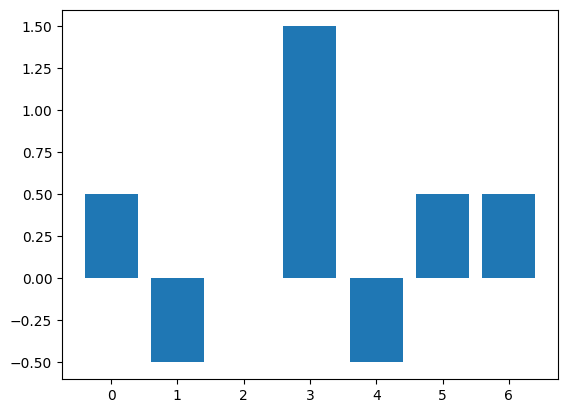

In [9]:
# https://scikit-learn.org/stable/modules/linear_model.html#quantile-regression
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html#sphx-glr-auto-examples-linear-model-plot-quantile-regression-py
from sklearn.metrics import mean_pinball_loss
import matplotlib.pyplot as plt
import numpy as np
x = [0, 1, 2, 3, 4, 5, 6]
y_true = np.array([3, -0.5, 2, 9, 5, 6, 7])
y_pred = np.array([2.5, 0.0, 2, 7.5, 5.5, 5.5, 6.5])
diff = y_true - y_pred
plt.bar(x, height=diff)
mean_pinball_loss(y_true, y_pred, alpha=0.25)
# чим нижчий альфа, тим сильніше ми штрафуємо перепрогноз

In [10]:
# деякі моделі дозволяють використання квантильної похибки:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor(loss="quantile")

GradientBoostingRegressor(loss='quantile')

## Classification

### Accuracy

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

from sklearn.metrics import accuracy_score
y_pred = [1, 0, 0, 3]
y_true = [0, 1, 2, 3]
accuracy_score(y_true, y_pred)

0.25

#### Problem 1: imbalanced data

In [12]:
y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
accuracy_score(y_true, y_pred)

0.9375

Oversampling/undersampling

![oversampling-undersampling](https://av-eks-blogoptimized.s3.amazonaws.com/1*H6XodlitlGDl9YdbwaZLMw.png)

https://imbalanced-learn.org/stable/over_sampling.html

#### Problem 2: weight of mistake
Приклад: 
- оцінка банком кредитоспроможності клієнта
- тестування онкологічних хвороб

#### Precision & Recall

![precision-recall](https://miro.medium.com/v2/resize:fit:1120/format:webp/1*AEV3TE67ahMn3NVpU0ov4g.png)

Див: https://pair.withgoogle.com/explorables/measuring-fairness/

#### Binary F1 score (One-vs-Rest)
![binary-f1](https://iamirmasoud.com/wp-content/uploads/2023/04/image-33.png)

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
y_true = [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
precision_score(y_true, y_pred)

0.9375

In [14]:
recall_score(y_true, y_pred)

1.0

In [15]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
f1_score(y_true, y_pred)

0.967741935483871

In [16]:
precision_score(y_true, y_pred, pos_label=0)

/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [17]:
recall_score(y_true, y_pred, pos_label=0)

0.0

In [18]:
f1_score(y_true, y_pred, pos_label=0)

0.0

#### Weighted F1
![weighted-f1](https://iamirmasoud.com/wp-content/uploads/2023/04/image-36.png)

In [19]:
f1_score(y_true, y_pred, average='weighted')

0.907258064516129

#### Micro F1
![micro-f1](https://iamirmasoud.com/wp-content/uploads/2023/04/image-39.png)

In [20]:
# micro: спочатку окремі міри точності і повноти по класу, а потім f1 по цих мірах

f1_score(y_true, y_pred, average='micro')

0.9375

#### Macro F1
![macro-f1](https://iamirmasoud.com/wp-content/uploads/2023/04/image-34.png)

In [21]:
# macro: спочатку окремі f1 по кожному класу, а потім їх середнє
f1_score(y_true, y_pred, average='macro')

0.4838709677419355

In [22]:
(f1_score(y_true, y_pred, pos_label=0) + f1_score(y_true, y_pred, pos_label=1)) / 2

0.4838709677419355

#### PR-Curve

![PR-Curve](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-07-08/pr-curve.png)

In [23]:
y_pred = np.flip(np.tril(np.ones((7,6),int),-1), axis=1)
y_true = np.array([0, 1, 0, 0, 1, 1])

prec = [precision_score(y_true, i) for i in y_pred]
rec = [recall_score(y_true, i) for i in y_pred]

/Users/nataliakees/miniconda3/envs/python_data_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
y_pred

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

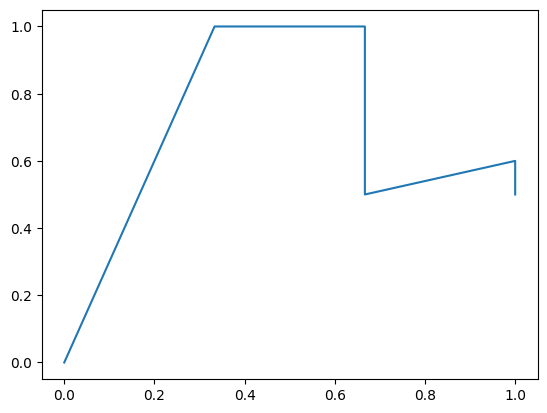

In [25]:
plt.plot(rec, prec)

#### ROC-AUC Curve

Area Under the Receiver Operating Characteristic Curve (ROC AUC)

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
X = np.array([1, 2, 3, 4]).reshape(-1, 1)
y_true = np.array([1.0, 0.0, 1.0, 0.0])

clf = LogisticRegression().fit(X, y_true)
roc_auc_score(y_true, y_score=clf.predict_proba(X)[:, 1])

0.75

In [27]:
clf.predict_proba(X)[:, 1]

array([0.66358509, 0.55636827, 0.44363053, 0.33641383])

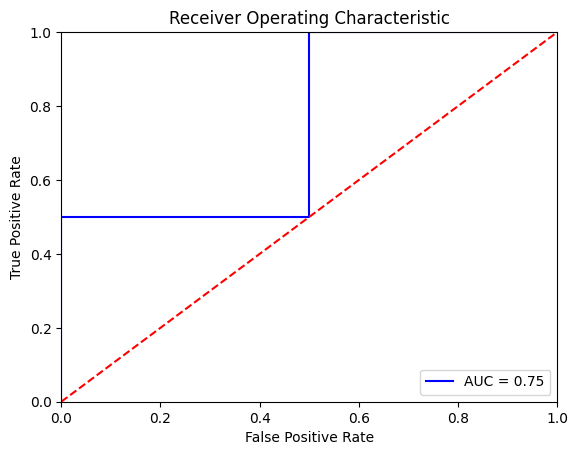

In [28]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_true, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()